# K-Means Clustering

INFO 371 Spring 2018

Lab created by: Christie Gan

Deadline: 5/23/18 11:59PM

Last Edit: 5/19/2018

This is a type of unsupervised learning, and one of the more popular clustering algorithms out there. The algorithm clusters the data into K number of clusters. It is used in a variety of applications, including clustering languages, image segmentation, and anomaly detection. The general idea is that it picks k random points as cluster centers (centroids), assign each point to the nearest centroid by calculating distance, find new centroids by taking the average of the assigned points, and repeat until none of the centroid assignment change anymore.

Data taken from: http://archive.ics.uci.edu/ml/datasets/Wholesale+customers# This dataset has data on annual spending on types of grocery categories.

In [9]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans as km
%matplotlib inline
#import any other packages you want to use


In [13]:
#Load the wholesaledata.csv data
data = pd.read_csv('data.csv')


### 1.) Select just the Fresh and Grocery columns and set the two columns into a dataframe.

In [14]:
data_fresh = data[['Fresh', 'Grocery']]

### 2.) Plot out all the Within Cluster Sum of Squares (y-axis) vs the number of possible clusters (x-axis). Make the range of possible clusters go from 1 to 50 clusters. 

Text(0.5,1,'WCSS and Number of Clusters')

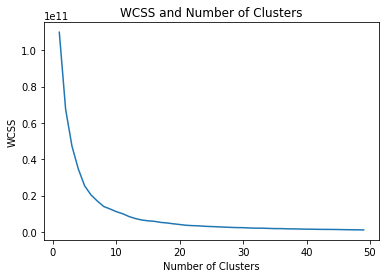

In [20]:
wcss = []
for i in range(1,50):
    kmeans = km(n_clusters = i, init = 'k-means++', max_iter = 300) #300 default
    kmeans.fit(data_fresh)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,50), wcss)
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.title("WCSS and Number of Clusters")

### 3.) Based on the graph, find the optimal number of clusters in this dataset. No code necessary, just eyeball it. Which point of the graph would have the best sum of sqaures, or in other words, how many clusters would best divide up this dataset?

5 or 4 clusters seems to be the best number of clusters because there is the greatest slope at that point

### 4.) Use K Means classification to find the separate clusters (groups of annual spending on types of food) out of the dataset. Use the K value you found in question 3. Plot out the different clusters (first plot out the original data, then plot out the centroids of each cluster)

In [47]:
model = km(5).fit(data_fresh)
centroid = model.cluster_centers_ 
clusters = model.labels_

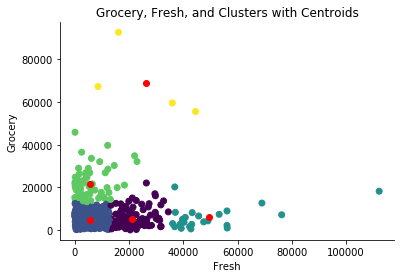

In [46]:
ax = plt.axes()
plt.scatter(data_fresh.Fresh, data_fresh.Grocery, c=model.labels_.astype(float))
plt.scatter(centroid[:,0], centroid[:,1], c = 'red')
plt.ylabel("Grocery")
plt.xlabel("Fresh")
plt.title("Grocery, Fresh, and Clusters with Centroids")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)